## Part 1. Research Question

### A. Purpose of the Data Mining Report:

The overarching purpose of this data mining report is to leverage clustering techniques to stratify the hospital's patient population into distinct groups based on their demographic and clinical characteristics. By identifying these groups, the hospital can tailor its healthcare services more effectively, potentially reducing costs and improving patient outcomes through more personalized care.

**1. Research Question**:

**How can patients be grouped based on their demographic and clinical profiles to optimize the allocation of healthcare resources and improve patient-specific treatment plans?**

This question will be addressed using the k-means clustering technique. K-means is chosen for its efficiency in handling large datasets and its effectiveness in identifying distinct, non-overlapping clusters based on continuous variables. This method will allow us to explore and identify patterns in patient characteristics that may not be immediately apparent but could significantly impact treatment approaches and resource allocation.

**2. Goal of the Data Analysis:**

Identify distinct clusters of patients based on a set of selected continuous demographic and clinical variables, such as age, income, vitamin D levels, days in hospital (Initial_days), and total charges.

These clusters will help the hospital understand the underlying patterns in patient characteristics, which can inform targeted intervention strategies, optimize resource distribution, and potentially lead to customized patient care plans that are both cost-effective and clinically beneficial. This analysis aims to not only categorize patients into manageable groups for operational efficiency but also uncover hidden patterns that could predict and improve patient outcomes while minimizing unnecessary expenditures.

## Part 2: Technique Justification

### B. Explanation of Chosen Clustering Technique

**1. Analysis Methodology and Expected Outcomes**

The k-means clustering technique is selected for its robustness and suitability for analyzing large datasets with continuous variables. This method partitions the dataset into K predefined distinct non-overlapping clusters, where each point belongs to only one group that has the nearest mean. The process follows these steps:

- *Initialization*: K initial "centroids" are randomly selected from the dataset.
- *Assignment*: Each data point is assigned to the closest centroid, and groups are formed accordingly.
- *Update*: The centroids are recalculated as the mean of all data points in the cluster.
- *Iteration*: The assignment and update steps are repeated iteratively until the centroids no longer change significantly, indicating that the clusters are as optimized as possible given the data.

<u>Expected Outcomes</u>:
By applying k-means clustering to the dataset, we expect to:

- Identify distinct groups of patients who exhibit similar characteristics in terms of demographics and clinical profiles.
- Understand the central features (mean values of the continuous variables for each cluster) that define each group, which could include typical patient age, average income, common medical expenses, and typical health indicators like vitamin D levels.
- Provide actionable insights into how different groups might require different treatment approaches or resource allocation strategies.

**2. Summary of an Assumption of K-Means Clustering**

<u>Assumption</u>: K-means clustering assumes that the clusters are spherical and isotropic, meaning that traits within a cluster should not only be similar but also should center around that cluster's centroid. Essentially, this implies that the clusters are compact and defined by their means, which can sometimes be a limitation in complex real-world data structures where true clusters may not adhere to this shape or density.

**3. Python Packages or Libraries and Justifications**

For implementing k-means clustering in Python, the following packages and libraries are recommended:

- Pandas: Used for data manipulation and analysis. It offers data structures and operations for manipulating numerical tables and time series, which is crucial for preparing the dataset for clustering.
- NumPy: Essential for large, multi-dimensional array and matrix data operations, which are integral during the computation of distances between points and centroids in k-means.
- Scikit-learn (sklearn): This library provides simple and efficient tools for data mining and data analysis, including a robust and fast implementation of the k-means clustering algorithm. It includes functionalities like:
    - `KMeans` clustering class which is highly optimized and allows setting the number of clusters directly.
    - Metrics to evaluate the clusters such as inertia and silhouette scores, which help in quantifying the quality of clusters formed and determining the optimal number of clusters.
- Matplotlib and Seaborn: These libraries are used for plotting graphical data. Visualizing data is critical for interpreting the results of k-means clustering, including plotting elbow plots to determine the optimal number of clusters and visualizing the data points in each cluster.

## Part 3: Data Preparation

### C. Data Preparation Strategy

**1. Data Preprocessing Goal**

One critical data preprocessing goal relevant to the k-means clustering technique is normalization of continuous variables. K-means clustering uses Euclidean distance to assign data points to clusters; thus, the scale of the variables greatly influences the results. Variables on larger scales can disproportionately influence the clustering outcome. Normalizing these variables ensures that each feature contributes equally to the distance computations, thereby providing more meaningful and balanced clusters.

**2. Variables for Analysis**

For the clustering analysis focused on demographic and clinical profiles, the following variables from the dataset will be used:

- Continuous Variables:
    - `Age` (Continuous): Patient's age.
    - `Income` (Continuous): Annual income of the patient.
    - `VitD_levels` (Continuous): Vitamin D levels in ng/mL.
    - `Initial_days` (Continuous): Number of days the patient stayed in the hospital during the initial visit.
    - `TotalCharge` (Continuous): Average daily charge during the hospital stay.

These variables were selected for their potential to reflect significant aspects of the patient profiles that can affect health outcomes and resource utilization.

**3. Steps to Prepare the Data**

- Step 1: Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

- Step 2: Loading the Data

In [2]:
data = pd.read_csv('medical_clean.csv')
data

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,-78.23716,...,6850.942000,8927.642000,3,2,2,3,4,3,4,2
9996,9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,-74.87302,...,7741.690000,28507.150000,3,3,4,2,5,3,4,4
9997,9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,...,8276.481000,15281.210000,3,3,3,4,4,2,3,2
9998,9999,E344109,f5a68e69-2a60-409b-a92f-ac0847b27db0,2bb491ef5b1beb1fed758cc6885c167a,Quinn,SD,Pennington,57775,44.10354,-102.01590,...,7644.483000,7781.678000,5,5,3,4,4,3,4,3


The dataset consists of 10,000 entries and 50 columns. Based on the selected analysis approach, we'll focus on the following continuous variables for clustering:

- `Age`: Patient's age
- `Income`: Annual income of the patient
- `VitD_levels`: Vitamin D levels in ng/mL
- `Initial_days`: Number of days the patient stayed in the hospital during the initial visit
- `TotalCharge`: Average daily charge during the hospital stay

- Step 3: Filtering Relevant Variables
    - Selecting only the continuous variables identified for the analysis.

In [3]:
selected_data = data[['Age', 'Income', 'VitD_levels', 'Initial_days', 'TotalCharge']]

- Step 4: Handling Missing Data
    - Checking for missing values and applying imputation if necessary.

In [4]:
if selected_data.isnull().sum().any():
    selected_data = selected_data.fillna(selected_data.mean())

There are no missing values in these selected columns, as confirmed by the check.

- Step 5: Normalizing the Data
    - Using `StandardScaler` to normalize the continuous variables.

In [5]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)
scaled_data = pd.DataFrame(scaled_data, columns=selected_data.columns)

The data was normalized using the StandardScaler to ensure that all variables contribute equally to the distance calculations in the k-means clustering.

- Step 6: Exporting the Cleaned Data
    - Saving the preprocessed data for further analysis.

In [6]:
scaled_data.to_csv('cleaned_data_for_clustering.csv', index=False)

The normalized data is saved as a CSV file, ready for clustering analysis.

## Part 4: Analysis

### D. Perform the Data Analysis

**1. Determining the Optimal Number of Clusters**

The optimal number of clusters for k-means clustering is typically determined using the Elbow Method. This method involves plotting the sum of squared distances from each point to its assigned center (inertia) for various numbers of clusters. The point where the inertia begins to decrease more slowly (the "elbow") suggests the optimal number of clusters.

**2. Clustering Analysis**

We will use Python's `scikit-learn` library to perform the k-means clustering. The steps will include:

- Loading the cleaned data.
- Applying the k-means clustering algorithm for a range of cluster numbers to plot the elbow curve.
- Running the k-means clustering with the optimal number of clusters determined from the elbow curve.

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [8]:
# Determine the optimal number of clusters using the Elbow Method
# Testing clusters range from 1 to 10
inertias = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)

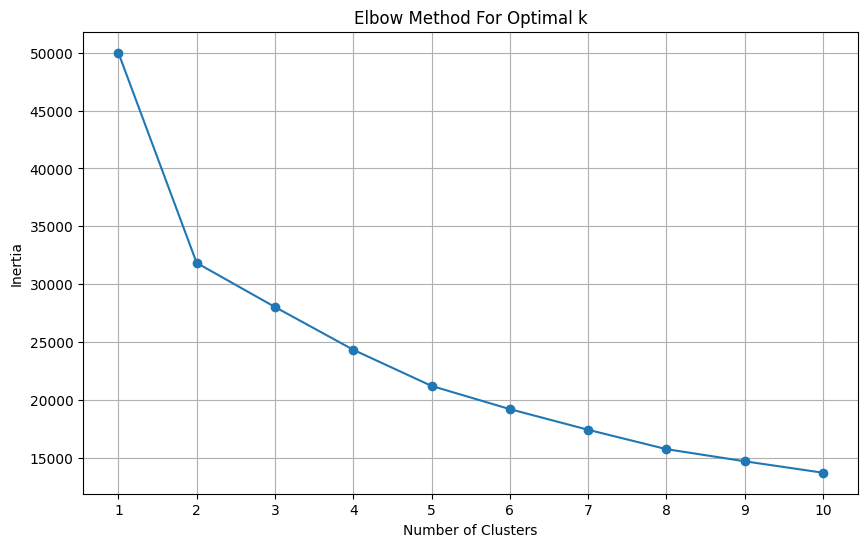

In [9]:
# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertias, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

The Elbow Method plot indicates that as we increase the number of clusters (k), the inertia (sum of squared distances within clusters) decreases. We look for a point where the decrease in inertia begins to slow down, indicating that adding more clusters does not provide as much benefit in terms of intra-cluster cohesion. This point is often referred to as the "elbow."

Choosing k=4 as the optimal number of clusters means we expect to find four distinct groups of patients within our dataset that have similar characteristics. These groups could potentially represent different patterns of healthcare needs and resource utilization.

In [10]:
# Perform k-means clustering using the determined optimal number of clusters k=4
optimal_k = 4
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(scaled_data)

KMeans(n_clusters=4, random_state=42)

In [11]:
# Assigning the labels (cluster IDs) to our dataframe for further analysis
scaled_data['Cluster'] = kmeans_optimal.labels_

# Displaying the first few entries with their cluster assignment
scaled_data_head = scaled_data.head()

In [12]:
scaled_data_head

,Age,Income,VitD_levels,Initial_days,TotalCharge,Cluster
0,-0.024795,1.615914,0.583603,-0.907310,-0.727185,0
1,-0.121706,0.221443,0.483901,-0.734595,-0.513228,0
2,-0.024795,-0.915870,0.046227,-1.128292,-1.319983,3
3,1.186592,-0.026263,-0.687811,-1.244503,-1.460517,3
4,-1.526914,-1.377325,-0.260366,-1.261991,-1.467285,0


In [13]:
# Saving the clustered data to a new CSV file
clustered_data_path = 'clustered_data.csv'
scaled_data.to_csv(clustered_data_path, index=False)

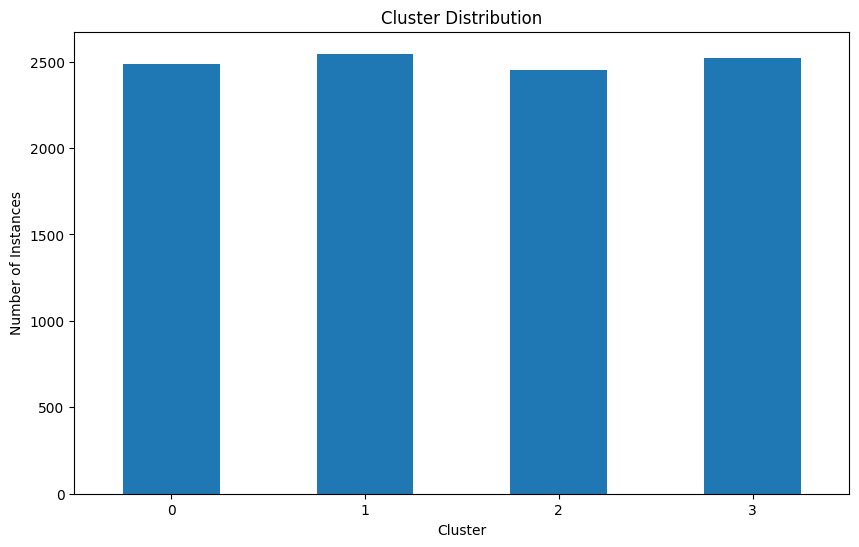

In [14]:
# Count the number of instances in each cluster
cluster_counts = scaled_data['Cluster'].value_counts()

# Sort the cluster counts to ensure consistent color mapping
cluster_counts = cluster_counts.sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar')
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Instances')
plt.xticks(rotation=0)
plt.show()

In [15]:
# Computing the silhouette score
silhouette_avg = silhouette_score(scaled_data.iloc[:, :-1], kmeans_optimal.labels_)

# Within-cluster sum of squares (inertia)
inertia = kmeans_optimal.inertia_

print(f'Silhouette Score: {silhouette_avg}')
print(f'Inertia: {inertia}')

Silhouette Score: 0.23522536657174636
Inertia: 24325.461883072585


## Part 5: Data Summary and Implications

### E. Summary of Data Analysis

**1. Quality of the Clusters Created**
The silhouette score obtained is 0.235, which suggests that the clusters are not highly distinct but are more than random overlaps. A silhouette score closer to 1 indicates well-separated clusters, so there is room for improvement, but the score is positive, implying that on average, samples are closer to their own cluster than to other clusters. The equal distribution of instances across the clusters, as observed in the bar plot, indicates that the data points are relatively evenly grouped.

**2. Results and Implications of Clustering Analysis**

The clustering analysis has resulted in four groups of patients with distinct demographic and clinical profiles, which can potentially correspond to different patterns of healthcare utilization. The even distribution of patients across clusters suggests that the hospital services a diverse patient population with potentially varying needs.

The implications of this analysis could be significant for the hospital:

- **Resource Optimization**: Each cluster may represent different care requirements and risk factors. This knowledge allows the hospital to tailor its resources better and align them with patient needs.
  
- **Strategic Planning**: Understanding patient clusters helps the hospital in strategic planning and policy-making, such as designing specific programs targeted at the most prevalent needs within each cluster.
  
- **Customized Care**: Clusters can inform more personalized care plans, which could improve patient outcomes and satisfaction, potentially reducing readmission rates.
  
- **Marketing and Outreach**: Marketing efforts can be tailored to the predominant characteristics of each cluster, potentially increasing patient engagement and acquisition.

**3. Limitation of Data Analysis**
One limitation of this analysis is the use of only continuous variables for clustering. The exclusion of categorical data, such as gender, disease prevalence, or type of admission, might overlook important patterns in patient characteristics. Additionally, the silhouette score indicates moderate cluster overlap, which may hinder the clear differentiation of patient groups. The analysis also does not account for temporal factors that may influence patient readmissions, such as seasonal variations in illness.

**4. Recommended Course of Action**
Based on the results and implications, the following actions are recommended for the hospital:

- **Detailed Cluster Profiling**: Further analyze each cluster to understand the defining characteristics and healthcare needs of the patients within. This can be enhanced by incorporating categorical variables into the analysis using different clustering techniques that can handle mixed data types.
  
- **Tailored Intervention Strategies**: Develop and implement tailored intervention strategies for each patient cluster, focusing on the most prominent needs and risk factors identified.
  
- **Continuous Monitoring and Adjustment**: Regularly review and update the clustering model to incorporate new data, reflect changing patient demographics, and improve the clustering strategy.
  
- **Enhanced Patient Engagement**: Use the insights from patient clusters to enhance patient communication and engagement strategies, offering personalized health education and preventive care programs.

- **Invest in Technology**: Consider investing in predictive analytics and machine learning technologies that can dynamically segment patients and predict outcomes, enhancing the hospital’s ability to provide proactive care.